### Convolutional Neural Networks (CNN)
The primary difference between CNN and any other ordinary neural network is that CNN takes input as a two-dimensional array and operates directly on the images rather than focusing on feature extraction which other neural networks focus on.

The dominant approach of CNN includes solution for problems of recognition.

Every convolutional neural network includes three basic ideas:
- **Local respective fields**: CNN utilize spatial correlations that exist within the input data. Each in the concurrent layers of neural networks connects of some input neurons. This specific region is called Local Receptive Field. It only focuses on hidden neurons. The hidden neuron will process the input data inside the mentioned field not realizing the changes outside the specific boundary.
- **Convolution**: In the above figure, we observe that each connection learns a weight of hidden neuron with an associated connection with movement from one layer to another. Here, individual neurons perform a shift from time to time. This process is called “convolution”. The mapping of connections from the input layer to the hidden feature map is defined as “shared weights” and bias included is called “shared bias”.
- **Pooling**: Convolutional neural networks use pooling layers which are positioned immediately after CNN declaration. It takes the input from the user as a feature map which comes out convolutional networks and prepares a condensed feature map. Pooling layers help in creating layers with neurons of previous layers.

In [1]:
import torch
import torch.nn as nn

device = "cuda" if torch.has_cuda else "cpu"

class CNN_Classification_Net(nn.Module):
    def __init__(self, num_classes, input_shape) -> None:
        super(CNN_Classification_Net,self).__init__()

        # first convolution layer + activation + max pooling (first layer it to capture the edges)
        self.conv1 = nn.Conv2d(in_channels = input_shape[0], out_channels = 20,
                                kernel_size=(5, 5)) #Resulting tensor size (20,24,24)
        self.act1 = nn.ReLU()#Keeping in mind that both ReLU and Pooling are doing the same thing (max(f(x),f(x2)) = f(max(x1,x2))) so the order doesn't matter.
        self.pool1 = nn.MaxPool2d(kernel_size= 2) #Resulting tensor size (20,12,12)
        self.bn1 = nn.BatchNorm2d(num_features = 20) #Batch normalization

        # second convolution layer + activation + max pooling (Second layer is for blobs and sphirical shapes)
        self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 50, 
                                kernel_size = (5, 5)) #Resulting tensor (50,8,8)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size = 2) #Resulting tensor (50,4,4)
        self.bn2 = nn.BatchNorm2d(num_features = 50) #Batch normalization

        # second convolution layer + activation + max pooling (Second layer is for blobs and sphirical shapes)
        self.conv3 = nn.Conv2d(in_channels = 50, out_channels = 100, 
                                kernel_size = (3, 3)) #Resulting tensor (100,2,2)
        self.act3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size = 2) #Resulting tensor (100,1,1)
        self.bn3 = nn.BatchNorm2d(num_features = 100) #Batch normalization

        # first linear layer + activation
        self.conv_output_len = (100*1*1)
        self.linear1 = nn.Linear(in_features = self.conv_output_len, out_features = 240) 
        self.act4 = nn.ReLU()

        # dropout between the linear layers
        self.drop = nn.Dropout(p=0.3)
        
        # second linear layer + activation
        self.linear2 = nn.Linear(in_features = 240, out_features = 120)
        self.act5 = nn.ReLU()

        # dropout between the linear layers
        self.drop = nn.Dropout(p=0.3)

        # third linear layer + activation
        self.linear3 = nn.Linear(in_features = 120, out_features = 60)
        self.act6 = nn.ReLU()

        # final linear layer to produce the correct number of outputs
        self.out = nn.Linear(in_features = 60, out_features = num_classes)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # perform convolution -> activation -> pooling
        x = self.bn1(self.pool1(self.act1(self.conv1(x))))
        x = self.bn2(self.pool2(self.act2(self.conv2(x))))
        x = self.bn3(self.pool3(self.act3(self.conv3(x))))

        # flatten the features obtained from the conv layers: (BATCH_SIZE, 50, 4, 4) -> (BATCH_SIZE, 50*4*4=800)
        batch_size = x.shape[0]
        x = x.view(batch_size, self.conv_output_len)

        # final linear layers and activations
        x = self.act4(self.linear1(x))
        x = self.act5(self.linear2(x))
        x = self.act6(self.linear3(x))
        x = self.out(x)

        return x

CNN_Model = CNN_Classification_Net(10,(1,28,28)).to(device)
print(CNN_Model)

CNN_Classification_Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(50, 100, kernel_size=(3, 3), stride=(1, 1))
  (act3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn3): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=100, out_features=240, bias=True)
  (act4): ReLU()
  (drop): Dropout(p=0.3, inplace=False)
  (linear2): Linear(in_features=240, out_features=120, bias=True)
  (act5): ReLU()
  (linear3

First part would be loading the data that I'll be using for the training and testing the network:

In [2]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

#Loading the data
training_data = MNIST(
    root="data", #Path to the data
    train=True, #Are the data for training
    download=True, #Download the data if they don't exist
    transform=ToTensor() #Transform the feature and label into tensors
)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

print(f"A sample of our data consists of {len(test_data[0])} parts, the first part being the image itself as a tensor \
is of the following shape '{test_data[0][0].shape}', while the oher part is an integer refering to the label.")

A sample of our data consists of 2 parts, the first part being the image itself as a tensor is of the following shape 'torch.Size([1, 28, 28])', while the oher part is an integer refering to the label.


Visualizing a sample from the trainingset to have a better understanding of what we're working with:

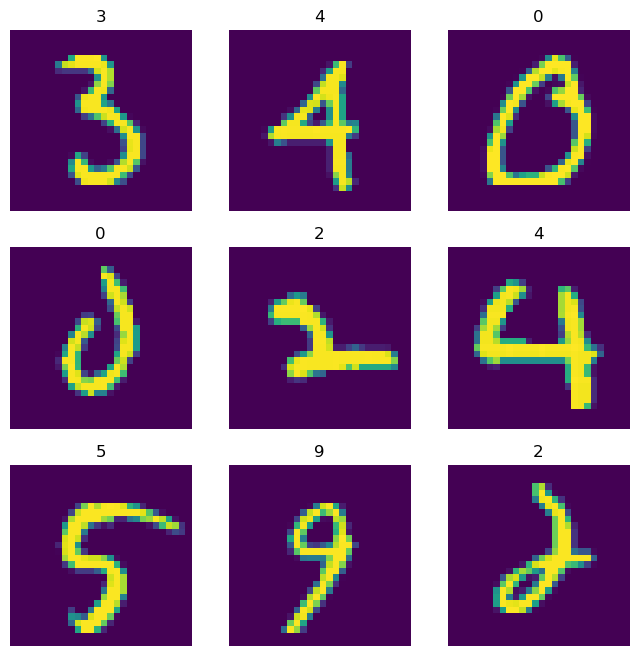

In [4]:
import torch
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8)) #defining the figure size
cols, rows = 3, 3 #numbers of rows and colomns

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() #taking a random sample from the training data
    img, label = training_data[sample_idx] #saving the img and label of that sample
    figure.add_subplot(rows, cols, i) #adding the subplot at the right position
    plt.title(str(label)) #printing the lable (class) of the image
    plt.axis("off") #switching the axis off for a better result
    plt.imshow(img.squeeze()) #visulizing the tensor as an image
plt.show()

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor,RandomPerspective,RandomRotation

#Loading the data in a dataloader
batch_size = 32
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

#Implementing both training and testing sets
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    avg_loss = 0

    for batch, (X, y) in enumerate(dataloader):
        #Putting both tensors on the GPU
        X=X.to(device)
        y=y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        avg_loss += loss.detach().cpu().numpy().item()

        # Backpropagation
        optimizer.zero_grad()#reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
        loss.backward()#Backpropagate the prediction loss
        optimizer.step()#adjust the parameters by the gradients collected in the backward pass.

        if batch % 600 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_loss /= num_batches
    train_losses.append(avg_loss)


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X) 
            test_loss += loss_fn(pred, y).detach().cpu().numpy().item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    val_losses.append(test_loss)
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#Defining the Training Parameters
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(CNN_Model.parameters(),lr = 0.001,weight_decay = 0.001)
epochs = 10

#Starting the training and testing
train_losses = []
val_losses = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, CNN_Model, loss_fn,optimizer)
    test_loop(test_dataloader, CNN_Model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.299164  [    0/60000]
loss: 0.060297  [19200/60000]
loss: 0.350888  [38400/60000]
loss: 0.004830  [57600/60000]
Test Error: 
 Accuracy: 98.5%, Avg loss: 0.052261 

Epoch 2
-------------------------------
loss: 0.002093  [    0/60000]
loss: 0.008107  [19200/60000]
loss: 0.004241  [38400/60000]
loss: 0.006693  [57600/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.037889 

Epoch 3
-------------------------------
loss: 0.011564  [    0/60000]
loss: 0.007433  [19200/60000]
loss: 0.026924  [38400/60000]
loss: 0.004837  [57600/60000]
Test Error: 
 Accuracy: 98.9%, Avg loss: 0.040988 

Epoch 4
-------------------------------
loss: 0.000175  [    0/60000]
loss: 0.011647  [19200/60000]
loss: 0.004641  [38400/60000]
loss: 0.014391  [57600/60000]
Test Error: 
 Accuracy: 99.0%, Avg loss: 0.033912 

Epoch 5
-------------------------------
loss: 0.001207  [    0/60000]
loss: 0.001213  [19200/60000]
loss: 0.048084  [38400/60000]
loss: 0.039511  [57600

Visualizing the training results:

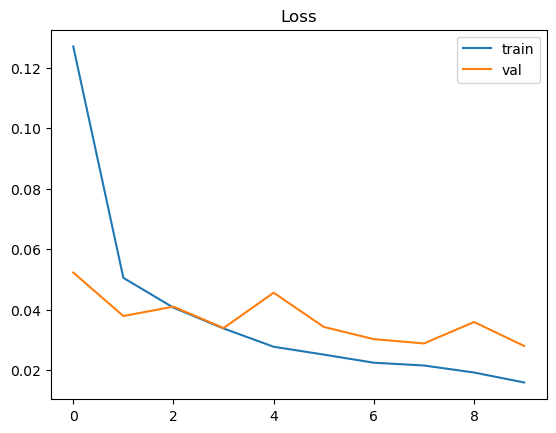

In [23]:
import matplotlib.pyplot as plt

plt.title("Loss")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.legend()
plt.show()

Predicting a sample from the testdata and visualizing the results:

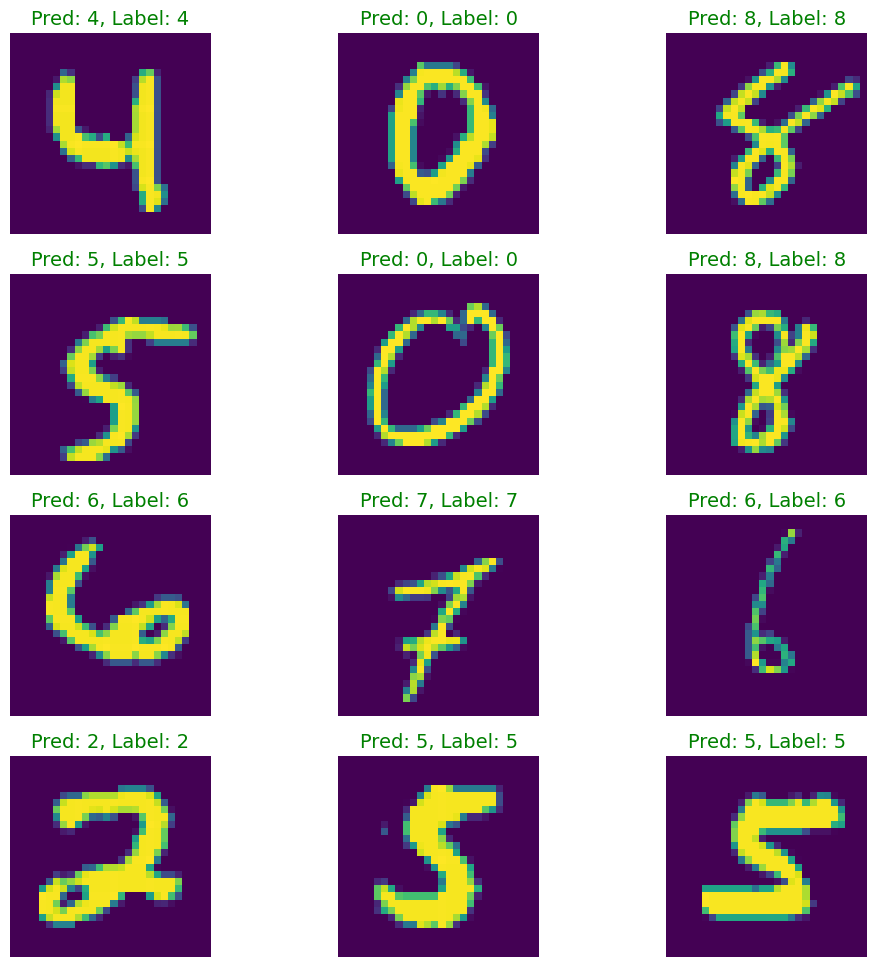

In [24]:
import torch
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 12))
cols, rows = 3, 4

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item() #Generating a random number from the dataset
    img, label = test_data[sample_idx]
    img, label = img.cuda(), label #Moving img Tensor to GPU to load it on the network
    pred = CNN_Model(img[None, ...]).argmax(1) #I've extended the tensor because the network expect a tensor of size 4 ([number of images, Channel, Width, Hight]) and the image sample would only have the last 3

    figure.add_subplot(rows, cols, i)
    plt.title(f"Pred: {str(pred.item())}, Label: {str(label)}", fontdict={"fontsize": 14, "color": ("green" if str(pred.item()) == str(label) else "red")})
    plt.axis("off")
    plt.imshow(img.cpu().squeeze()) #Had to move the tensor to the cpu before squeezing it to visualize it.

plt.show()

Lastly evaluating the model and seeing the elements that were falsly predicted:

100%|██████████| 10000/10000 [00:19<00:00, 516.93it/s]


Out of 10000 images the model has predicted 74 wrong images


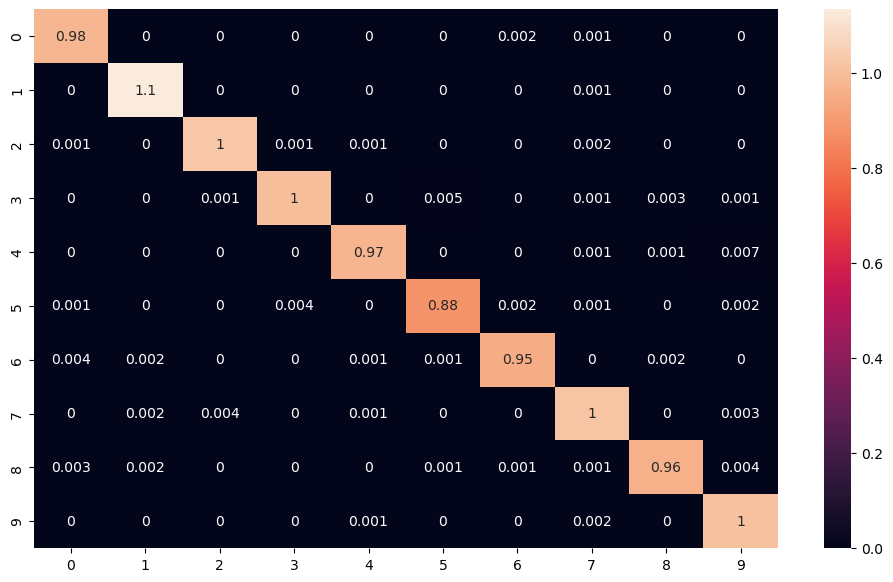

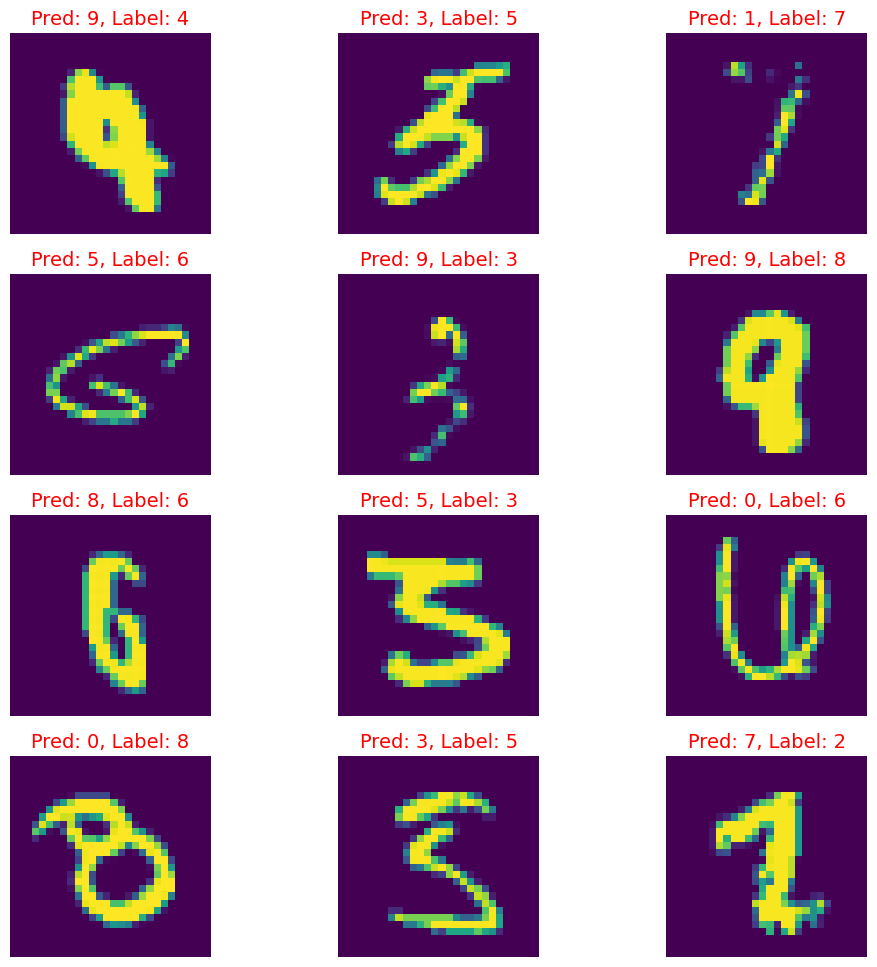

In [25]:

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
from tqdm import tqdm

y_pred = []
y_true = []
wrong_preds = []

CNN_Model.to("cpu")

# iterate over test data
for img, label in tqdm(test_data):
        output =CNN_Model(img[None, ...]).argmax(1)
        y_pred.append(output.item()) # Save Prediction
        y_true.append(label) # Save Truth
        if label != output:
            wrong_preds.append((img,label))

# images that the model predicted wrong
print(f"Out of {len(test_data)} images the model has predicted {len(wrong_preds)} wrong images")

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10) #instead of numbers to get a precentage
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

# Visualizing random images that the model predicted wrong
figure = plt.figure(figsize=(12, 12))
cols, rows = 3, 4

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(wrong_preds), size=(1,)).item() 
    img, label = wrong_preds[sample_idx]

    pred = CNN_Model(img[None, ...]).argmax(1)

    figure.add_subplot(rows, cols, i)
    plt.title(f"Pred: {str(pred.item())}, Label: {str(label)}", fontdict={"fontsize": 14, "color": ("green" if str(pred.item()) == str(label) else "red")})
    plt.axis("off")
    plt.imshow(img.cpu().squeeze()) 

plt.show()

Trying the same network structure for another data set:

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor,RandomPerspective,RandomRotation

#Loading the data
training_data = FashionMNIST(
    root="data", #Path to the data
    train=True, #Are the data for training
    download=True, #Download the data if they don't exist
    transform=ToTensor() #Transform the feature and label into tensors
)

test_data = FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = 32

#Loading the data in a dataloader
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
#Implementing both training and testing sets
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    avg_loss = 0

    for batch, (X, y) in enumerate(dataloader):
        #Putting both tensors on the GPU
        X=X.to(device)
        y=y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        avg_loss += loss.detach().cpu().numpy().item()

        # Backpropagation
        optimizer.zero_grad()#reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.
        loss.backward()#Backpropagate the prediction loss
        optimizer.step()#adjust the parameters by the gradients collected in the backward pass.

        if batch % 600 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_loss /= num_batches
    train_losses.append(avg_loss)


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X=X.to(device)
            y=y.to(device)
            pred = model(X) 
            test_loss += loss_fn(pred, y).detach().cpu().numpy().item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    val_losses.append(test_loss)
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

#Defining the Training Parameters
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(CNN_Model.parameters(),lr = 0.001,weight_decay = 0.001)
epochs = 10

#Starting the training and testing
train_losses = []
val_losses = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, CNN_Model, loss_fn,optimizer)
    test_loop(test_dataloader, CNN_Model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.320301  [    0/60000]
loss: 0.534898  [19200/60000]
loss: 0.579049  [38400/60000]
loss: 0.381489  [57600/60000]
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.346323 

Epoch 2
-------------------------------
loss: 0.209877  [    0/60000]
loss: 0.180413  [19200/60000]
loss: 0.178880  [38400/60000]
loss: 0.138963  [57600/60000]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.312729 

Epoch 3
-------------------------------
loss: 0.461170  [    0/60000]
loss: 0.162467  [19200/60000]
loss: 0.149420  [38400/60000]
loss: 0.240392  [57600/60000]
Test Error: 
 Accuracy: 88.7%, Avg loss: 0.298659 

Epoch 4
-------------------------------
loss: 0.309219  [    0/60000]
loss: 0.176110  [19200/60000]
loss: 0.419940  [38400/60000]
loss: 0.158906  [57600/60000]
Test Error: 
 Accuracy: 90.4%, Avg loss: 0.274058 

Epoch 5
-------------------------------
loss: 0.231671  [    0/60000]
loss: 0.198149  [19200/60000]
loss: 0.233532  [38400/60000]
loss: 0.137350  [57600

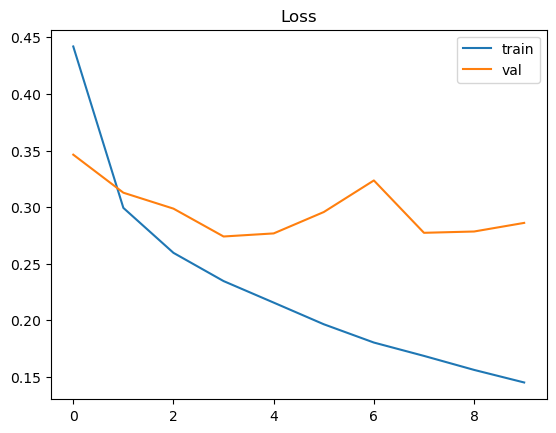

In [28]:
import matplotlib.pyplot as plt

plt.title("Loss")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.legend()
plt.show()

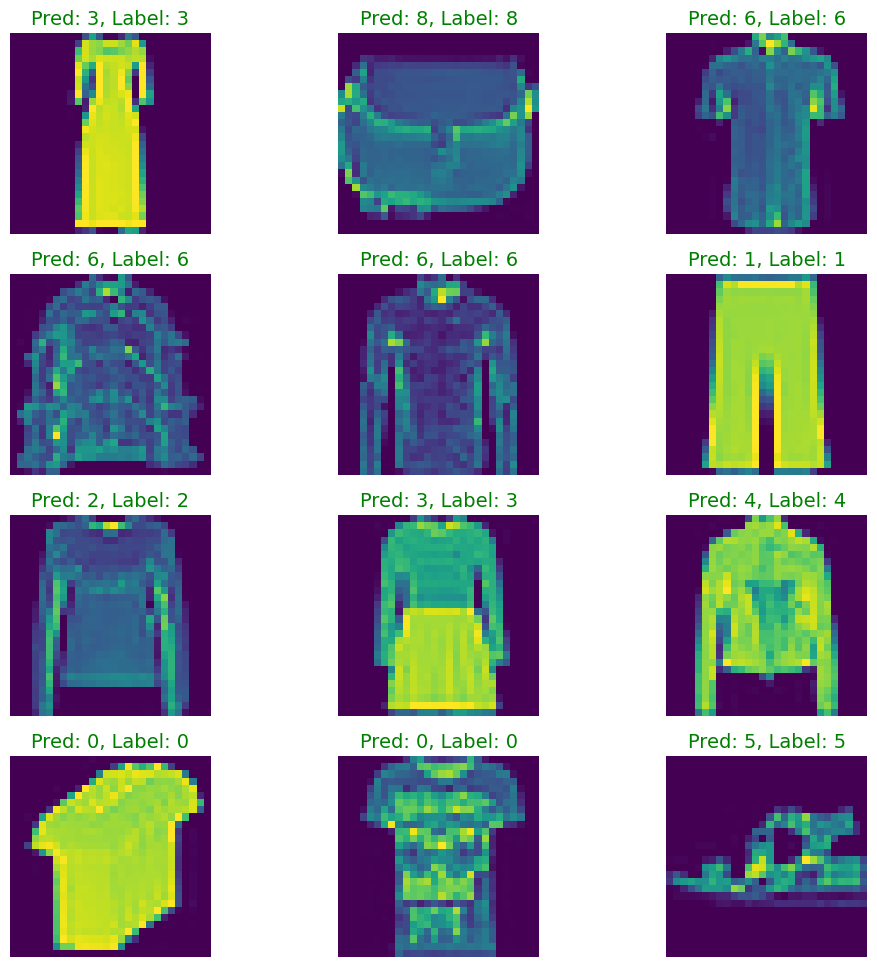

In [29]:
import torch
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 12))
cols, rows = 3, 4

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item() #Generating a random number from the dataset
    img, label = test_data[sample_idx]
    img, label = img.cuda(), label #Moving img Tensor to GPU to load it on the network
    pred = CNN_Model(img[None, ...]).argmax(1) #I've extended the tensor because the network expect a tensor of size 4 ([number of images, Channel, Width, Hight]) and the image sample would only have the last 3

    figure.add_subplot(rows, cols, i)
    plt.title(f"Pred: {str(pred.item())}, Label: {str(label)}", fontdict={"fontsize": 14, "color": ("green" if str(pred.item()) == str(label) else "red")})
    plt.axis("off")
    plt.imshow(img.cpu().squeeze()) #Had to move the tensor to the cpu before squeezing it to visualize it.

plt.show()

100%|██████████| 10000/10000 [00:17<00:00, 567.12it/s]


Out of 10000 images the model has predicted 947 wrong images


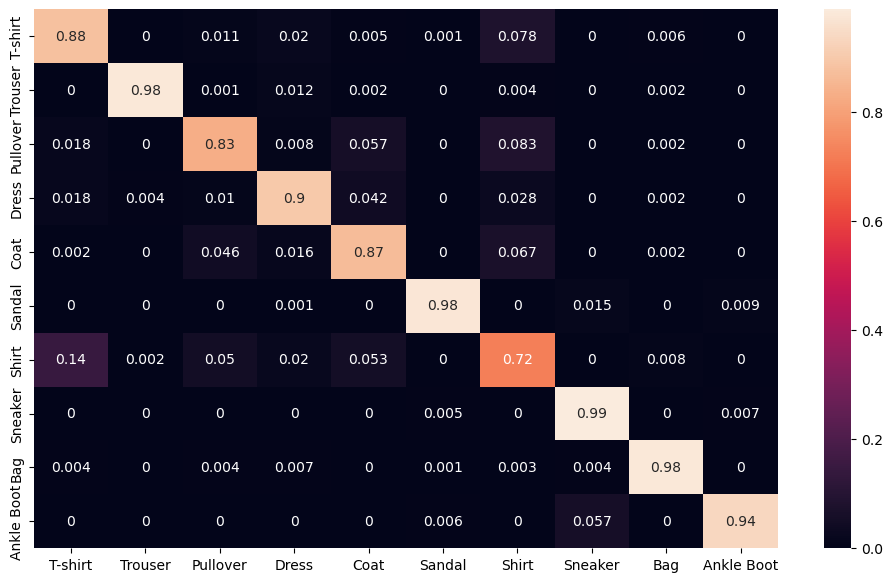

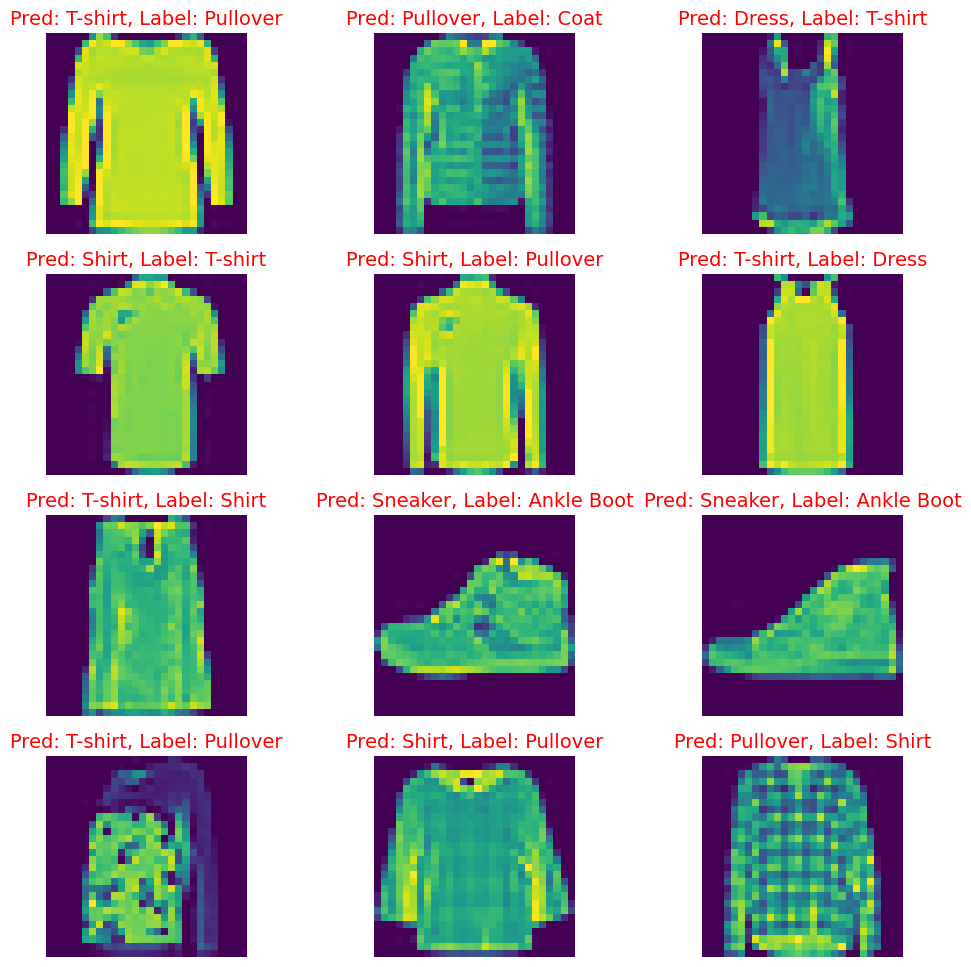

In [30]:

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
from tqdm import tqdm

y_pred = []
y_true = []
wrong_preds = []

CNN_Model.to("cpu")

# iterate over test data
for img, label in tqdm(test_data):
        output =CNN_Model(img[None, ...]).argmax(1)
        y_pred.append(output.item()) # Save Prediction
        y_true.append(label) # Save Truth
        if label != output:
            wrong_preds.append((img,label))

# images that the model predicted wrong
print(f"Out of {len(test_data)} images the model has predicted {len(wrong_preds)} wrong images")

# Build confusion matrix
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10,
                    index = [i for i in classes],
                    columns = [i for i in classes]) #instead of numbers to get a precentage
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

# Visualizing random images that the model predicted wrong
figure = plt.figure(figsize=(12, 12))
cols, rows = 3, 4

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(wrong_preds), size=(1,)).item() 
    img, label = wrong_preds[sample_idx]

    pred = CNN_Model(img[None, ...]).argmax(1)

    figure.add_subplot(rows, cols, i)
    plt.title(f"Pred: {classes[pred.item()]}, Label: {classes[label]}", fontdict={"fontsize": 14, "color": ("green" if pred.item() == label else "red")})
    plt.axis("off")
    plt.imshow(img.cpu().squeeze()) 

plt.show()

# Done :)